# Bovine Face Identifier

## Preliminaries

In [59]:
# Mount GDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
# Install and log into Weights & Biases for logging
# import wandb
# wandb.login()

In [61]:
# clone YOLOv5 & install dependencies
!git clone https://github.com/ultralytics/yolov5 # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12430, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (21/21), done.
 Receiving objects:  25% (3108/12430), 2.31 MiB | 1.44 MiB/sReceiving objects:  27% (3357/12430), 2.31 MiB | 1.44 MiB/sReceiving objects:  29% (3605/12430), 2.31 MiB | 1.44 MiB/sReceiving objects:  31% (3854/12430), 2.31 MiB | 1.44 MiB/sReceiving objects:  33% (4102/12430), 3.14 MiB | 1.49 MiB/sReceiving objects:  35% (4351/12430), 3.14 MiB | 1.49 MiB/sReceiving objects:  37% (4600/12430), 3.14 MiB | 1.49 MiB/sReceiving objects:  39% (4848/12430), 3.90 MiB | 1.50 MiB/sReceiving objects:  42% (5221/12430), 3.90 MiB | 1.50 MiB/sReceiving objects:  44% (5470/12430), 3.90 MiB | 1.50 MiB/sReceiving objects:  46% (5718/12430), 3.90 MiB | 1.50 MiB/sReceiving objects:  48% (5967/12430), 3.90 MiB | 1.50 MiB/sReceiving objects:  52% (6464/12430), 4.85 MiB | 1.56 MiB/sReceiving objects:  54% (6765/12430), 6.89 MiB | 1.67 MiB/sReceiving o

## Training

In [62]:
# Train a new model on the dataset
!python train.py --project cowface --img 224 --batch 128 --epochs 300 --data '/Users/adam/Git/agricam/data/yolo/dataset/data.yaml' --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/Users/adam/Git/agricam/data/yolo/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=128, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=cowface, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-355-ge5991c9 Python-3.9.12 torch-1.12.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv

## Detection & Localisation

In [13]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/adam/Git/agricam/best.pt')

Using cache found in /Users/adam/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-2 Python-3.9.12 torch-1.12.0 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [14]:
from matplotlib.pyplot import imshow
%matplotlib inline

'''
Run inference on, and return a cell count for, the given image
'''
def detect(img: str):
  # Run inference on the images
  results = model(f'/Users/adam/Git/agricam/data/yolo/dataset/images/{img}.jpg')

  # Iterate through the DataFrames and sum their lengths for a count of cells in the image
  df = results.pandas().xyxy

  # Display the first image in the results
  # print(len(results.imgs))
  results.render()
  imshow(results.imgs[0], cmap='gray')

  return df

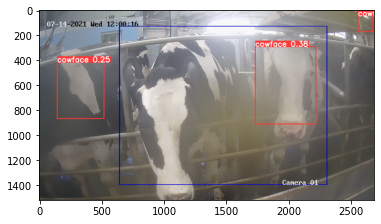

In [15]:
df1 = detect('test_1')

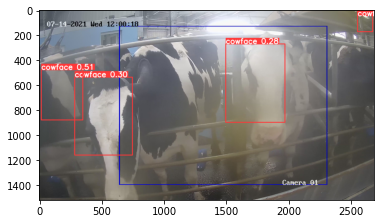

In [16]:
df2 = detect('test_2')

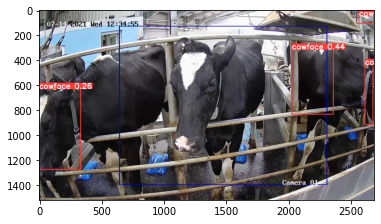

In [17]:
df3 = detect('test_3')